In [1]:
# Import relevant modules.
import numpy as np
import pandas as pd
import datetime as date
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
# Read csv file to 'data' with tabs as delimiter and line 0 as header.
data = pd.read_csv('./SCMS_Delivery_History_Dataset.csv', sep='\t', header=0)

In [3]:
# View all columns of data for initial inspection.
pd.set_option('display.max_columns', None)
data

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,10/16/14,N/A - From RDC,31-Jul-15,15-Jul-15,20-Jul-15,ARV,Pediatric,SCMS from RDC,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",Lamivudine/Nevirapine/Zidovudine,Generic,30/50/60mg,Chewable/dispersible tablet - FDC,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,10/24/14,N/A - From RDC,31-Jul-15,6-Aug-15,7-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,8/12/14,N/A - From RDC,31-Aug-15,25-Aug-15,3-Sep-15,ARV,Adult,SCMS from RDC,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Generic,600/300/300mg,Tablet - FDC,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,7/1/15,N/A - From RDC,9-Sep-15,4-Aug-15,11-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,17465,1138

In [4]:
# Convert dates to datetime. 
data['Scheduled Delivery Date'] = pd.to_datetime(
    data['Scheduled Delivery Date'])
data['Delivered to Client Date'] = pd.to_datetime(
    data['Delivered to Client Date'])
data['Delivery Recorded Date'] = pd.to_datetime(
    data['Delivery Recorded Date'])


In [5]:
# Create a new column for delivery days late 
data['Delivery Days Late'] = (data['Delivered to Client Date'] 
                                 - data['Scheduled Delivery Date']).dt.days

In [6]:
# Create a new column for delivery days off = abs(delivered - scheduled)
data['Delivery Days Off'] = abs((data['Delivered to Client Date'] 
                              - data['Scheduled Delivery Date']).dt.days)
data.sort_values('Delivery Days Off', ascending=False)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Delivery Days Late,Delivery Days Off
9620,85921,104-CI-T30,FPQ-9749,SO-42370,DN-2970,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,4/19/12,N/A - From RDC,2013-01-31,2012-01-25,2013-01-25,ARV,Adult,SCMS from RDC,Lamivudine/Nevirapine/Zidovudine 150/200/300mg...,Lamivudine/Nevirapine/Zidovudine,Generic,150/300/200mg,Tablet - FDC,60,40455,389177.10,9.62,0.16,Hetero Unit III Hyderabad IN,No,See DN-2970 (ID#:83644),See DN-2970 (ID#:83644),545.63,-372,372
7738,83644,104-CI-T30,FPQ-9749,SO-42370,DN-2970,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,4/19/12,N/A - From RDC,2013-01-31,2012-01-25,2013-01-25,ARV,Adult,SCMS from RDC,Lamivudine/Nevirapine/Zidovudine 150/200/300mg...,Lamivudine/Nevirapine/Zidovudine,Generic,150/300/200mg,Tablet - FDC,60,9577,92130.74,9.62,0.16,"Aurobindo Unit III, India",Yes,6889,24138.35,129.17,-372,372
430,4190,116-ZA-T01,Pre-PQ Process,SCMS-14050,ASN-1252,South Africa,PMO - US,Direct Drop,DDP,NaN,Pre-PQ Process,11/12/07,2008-01-29,2007-01-24,2008-01-24,ARV,Adult,"JSI R&T INSTITUTE, INC.","Stavudine 30mg [Zerit], capsules, 60 Caps",Stavudine,Zerit,30mg,Capsule,60,800,4792.00,5.99,0.10,"BMS Meymac, France",Yes,Weight Captured Separately,Freight Included in Commodity Cost,7.67,-370,370
7289,83100,109-TZ-T30,FPQ-10545,SO-43111,DN-2972,Tanzania,PMO - US,From RDC,N/A - From RDC,Truck,8/24/12,N/A - From RDC,2013-02-28,2012-02-26,2013-02-26,ARV,Pediatric,SCMS from RDC,"Efavirenz 200mg, scored tablets, 90 Tabs",Efavirenz,Generic,200mg,Tablet,90,5765,42084.50,7.30,0.08,"Strides, Bangalore, India.",Yes,350,2266,59.00,-368,368
739,7475,116-ZA-T01,Pre-PQ Process,SCMS-33320,ASN-3553,South Africa,PMO - US,Direct Drop,DDP,Truck,Pre-PQ Process,Date Not Captured,2009-05-17,2008-10-09,2008-10-09,ARV,Adult,S. BUYS WHOLESALER,"Zidovudine 300mg [Retrovir], tablets, 60 Tabs",Zidovudine,Retrovir,300mg,Tablet,60,350,4417.00,12.62,0.21,GSK Aranda,No,Weight Captured Separately,Freight Included in Commodity Cost,8.66,-220,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3707,31306,116-ZA-T30,FPQ-13973,SCMS-238551,ASN-26882,South Africa,PMO - US,Direct Drop,DDP,Truck,4/30/14,6/25/14,2014-06-25,2014-06-25,2014-06-25,ARV,Pediatric,PHARMACY DIRECT,"Efavirenz 50mg, capsule, 30 Caps",Efavirenz,Generic,50mg,Capsule,30,9,27.05,3.01,0.10,"Aurobindo Unit III, India",No,Weight Captured Separately,Freight Included in Commodity Cost,0.03,0,0
3708,31324,106-HT-T30,FPQ-16241,SCMS-288900,ASN-32495,Haiti,PMO - US,Direct Drop,EXW,Ocean,5/5/15,5/27/15,2015-08-10,2015-08-10,2015-08-11,ARV,Adult,HETERO LABS LIMITED,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Generic,600/300/300mg,Tablet - FDC,30,109350,1038825.00,9.50,0.32,Hetero Unit III Hyderabad IN,Yes,Weight Captured Separately,Invoiced Separately,1222.70,0,0
3709,31332,101-CD-T30,FPQ-14569,SCMS-250300,ASN-27786,"Congo, DRC",PMO - US,Direct Drop,EXW,Air,7/23/14,8/4/14,2015-02-05,2015-02-05,2015-02-11,ANTM,Malaria,IMRES B.V.,"Sulfadoxine/Pyrimethamine 500/25mg, tablets, 1...",Sulfadoxine/Pyrimethamine,Generic,500/25mg,Tablet - FDC,1000,1370,37401.00,27.30,0.03,"Guilin OSD site, No 17, China",Yes,1125,9693.68,38.45,0,0
3710,31363,116-ZA-T30,FPQ-13035,SCMS-215370,ASN-24415,South Africa,PMO - US,Direct Drop,DDP,Truck,10/8/13,12/2/13,2014-02-06,2014-02-06,2014-02-06,ARV,Pediatric,S. BUYS WHOLESALER,"Lamivudine 10mg/ml, oral soluti

In [7]:
# Remove columns that we know are unrelated to delivery delays. 
data = data.drop('Project Code', 1)
data = data.drop('PQ #', 1)
data = data.drop('PO / SO #', 1)
data = data.drop('ASN/DN #', 1)
data = data.drop('PQ First Sent to Client Date', 1)
data = data.drop('PO Sent to Vendor Date', 1)
data = data.drop('Line Item Insurance (USD)', 1)
data = data.drop('Item Description', 1)
data = data.drop('First Line Designation', 1)

<AxesSubplot:>

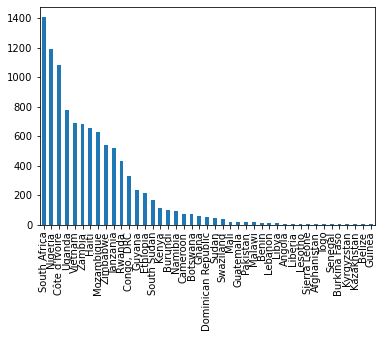

In [8]:
# Inspect data by using frequency distributions
data['Country'].value_counts().plot.bar()

In [9]:
# Group Countries with low frequency as 'Other'.
data['Country'] = data['Country'].replace([
    'Guinea', 'Belize', 'Kyrgyzstan', 'Burkina Faso', 
    'Kazakhstan', 'Togo', 'Senegal', 'Afghanistan', 'Lesotho', 
    'Sierra Leone', 'Liberia', 'Angola',  'Lebanon', 
    'Libya', 'Benin', 'Malawi', 'Guatemala', 'Pakistan', 
    'Mali', 'Swaziland', 'Sudan', 'Dominican Republic', 
    'Ghana', 'Botswana', 'Cameroon', 'Namibia', 'Burundi', 'Kenya'], 'Other')


<AxesSubplot:>

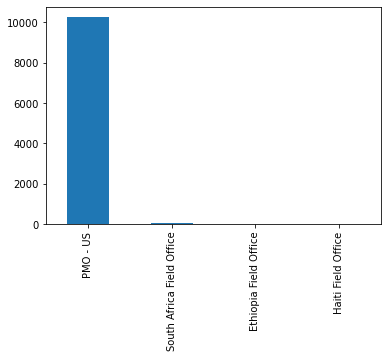

In [10]:
# Inspect data by using frequency distributions
data['Managed By'].value_counts().plot.bar()


In [11]:
# Remove 'Managed By' from data since it is almost all PMO-US.
data = data.drop('Managed By', 1)

<AxesSubplot:>

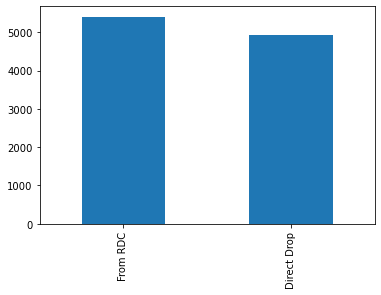

In [12]:
# Inspect data by using frequency distributions
data['Fulfill Via'].value_counts().plot.bar()

<AxesSubplot:>

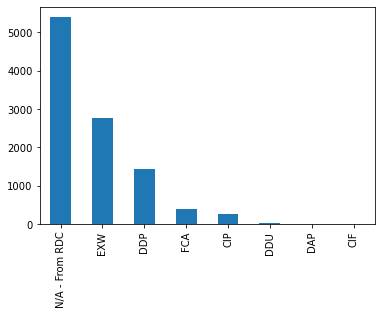

In [13]:
# Inspect data by using frequency distributions
data['Vendor INCO Term'].value_counts().plot.bar()

In [14]:
# Group values with low frequency as 'Other'
data['Vendor INCO Term'] = data['Vendor INCO Term'].replace(['FCA', 'CIP', 'DDU', 'DAP', 'CIF'], 'Other')

<AxesSubplot:>

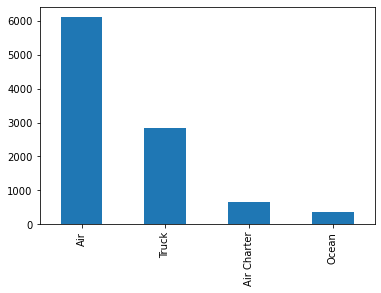

In [15]:
# Inspect data by using frequency distributions
data['Shipment Mode'].value_counts().plot.bar()

<AxesSubplot:>

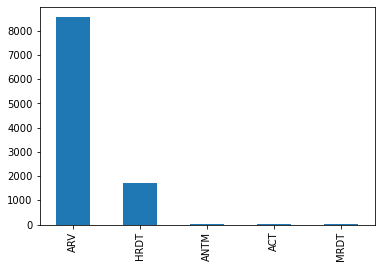

In [16]:
# Inspect data by using frequency distributions
data['Product Group'].value_counts().plot.bar()

In [17]:
data['Product Group'] = data[
    'Product Group'].replace(['ANTM', 'ACT', 'MRDT'], 'Other')

<AxesSubplot:>

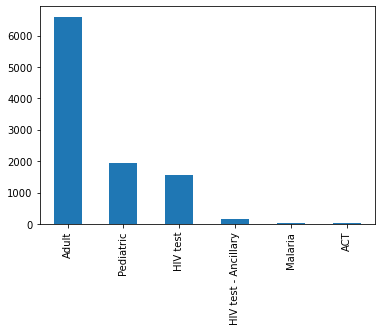

In [18]:
# Inspect data by using frequency distributions
data['Sub Classification'].value_counts().plot.bar()

In [19]:
# We can drop Sub Class as it directly relates to Product Group
data = data.drop('Sub Classification', 1)

<AxesSubplot:>

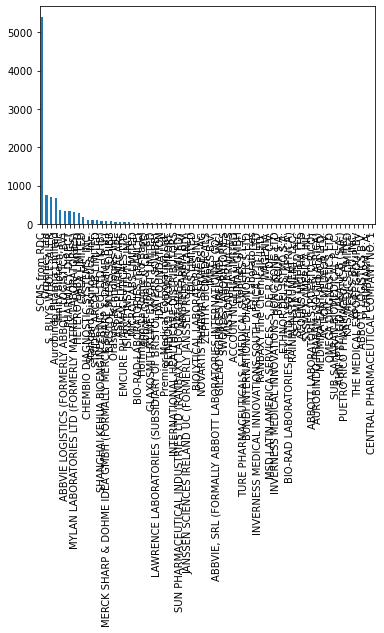

In [20]:
# Inspect data by using frequency distributions
data['Vendor'].value_counts().plot.bar()

In [21]:
data['Vendor_SCMS'] = data['Vendor'].apply(lambda x: 1 if x == 'SCMS from RDC' else 0)

In [22]:
data = data.drop('Vendor', 1)

<AxesSubplot:>

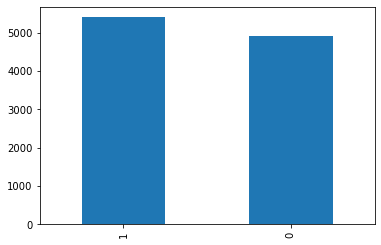

In [23]:
data['Vendor_SCMS'].value_counts().plot.bar()

<AxesSubplot:>

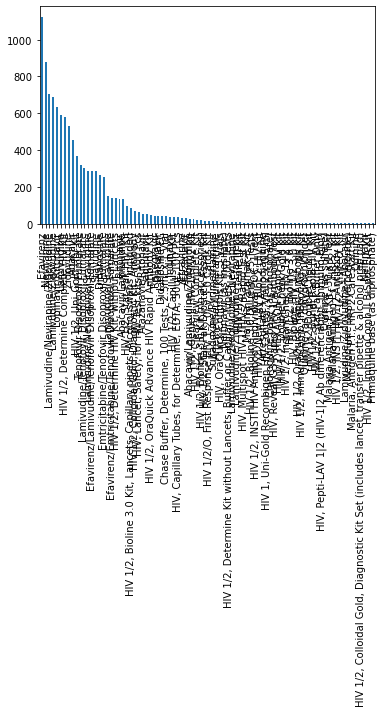

In [24]:
# Inspect data by using frequency distributions
data['Molecule/Test Type'].value_counts().plot.bar()

In [25]:
# Drop Test Type since it is too unique. 
data = data.drop('Molecule/Test Type', 1)

<AxesSubplot:>

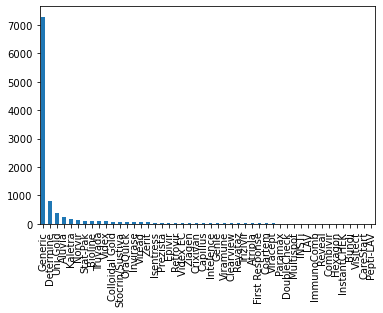

In [26]:
# Inspect data by using frequency distributions
data['Brand'].value_counts().plot.bar()

In [27]:
# Create a new column for generic vs non-generic brands. 
data['Generic Brand'] = data['Brand'].apply(lambda x: 1 if x == 'Generic' else 0)
# Remove original Brands column.
data = data.drop('Brand', 1)

<AxesSubplot:>

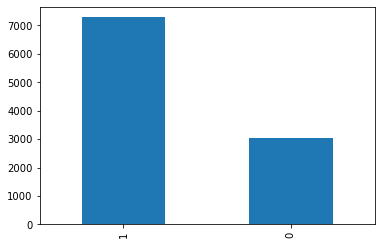

In [28]:
# Inspect data by using frequency distributions
data['Generic Brand'].value_counts().plot.bar()

<AxesSubplot:>

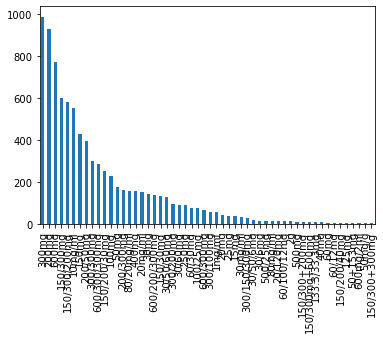

In [29]:
# Inspect data by using frequency distributions
data['Dosage'].value_counts().plot.bar()

In [30]:
# Drop dosage since it does not relate to shipping. 
data = data.drop('Dosage', 1)

<AxesSubplot:>

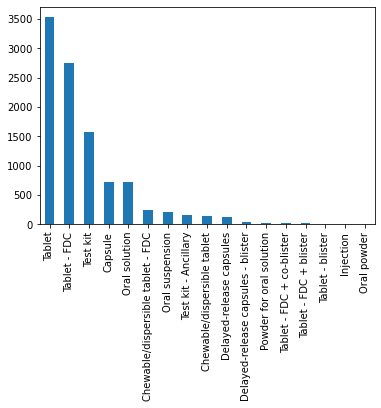

In [31]:
# Inspect data by using frequency distributions
data['Dosage Form'].value_counts().plot.bar()

In [32]:
data['Dosage Form'] = data['Dosage Form'].replace(['Tablet - blister', 'Tablet - FDC + blister', 
                 'Tablet - FDC + co-blister', 'Chewable/dispersible tablet', 
                 'Chewable/dispersible tablet - FDC', 'Tablet - FDC'], 'Tablet')
data['Dosage Form'] = data['Dosage Form'].replace(['Oral powder', 'Powder for oral solution', 
                                                  'Oral suspension'], 'Oral solution')
data['Dosage Form'] = data['Dosage Form'].replace(['Delayed-release capsules - blister', 
                                                   'Delayed-release capsules'], 'Capsule')
data['Dosage Form'] = data['Dosage Form'].replace(['Injection', 'Test kit - Ancillary'], 'Test kit')


<AxesSubplot:>

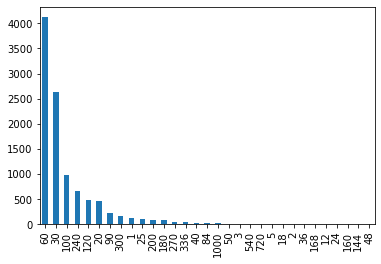

In [33]:
# Inspect data by using frequency distributions
data['Unit of Measure (Per Pack)'].value_counts().plot.bar()

In [34]:
# We do not care about how many units are in each pack
 # this is because pack is subjective. 
data = data.drop('Unit of Measure (Per Pack)', 1)

<AxesSubplot:>

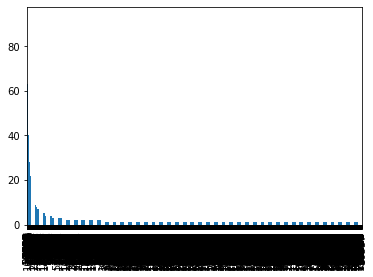

In [35]:
# Inspect data by using frequency distributions
data['Line Item Quantity'].value_counts().plot.bar()

<AxesSubplot:>

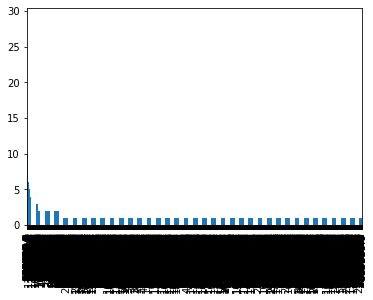

In [36]:
# Inspect data by using frequency distributions
data['Line Item Value'].value_counts().plot.bar()

<AxesSubplot:>

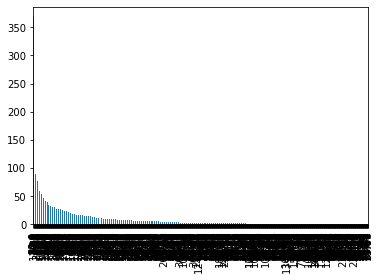

In [37]:
# Inspect data by using frequency distributions
data['Pack Price'].value_counts().plot.bar()

<AxesSubplot:>

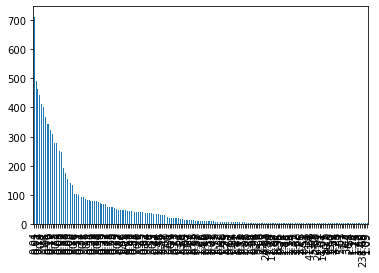

In [38]:
# Inspect data by using frequency distributions
data['Unit Price'].value_counts().plot.bar()

In [39]:
# We do not care about how much each unit costs since we do not know
    # the number of units shipped. 
data = data.drop('Unit Price', 1)

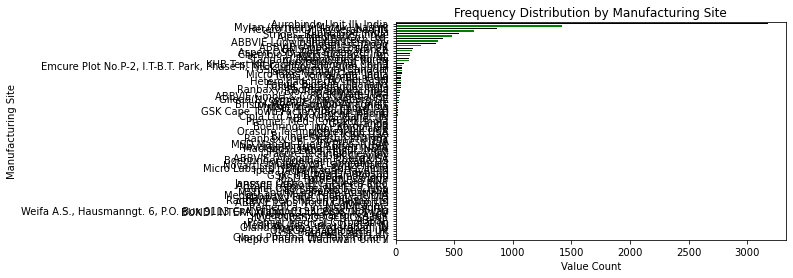

In [40]:
# Inspect data by using frequency distributions
fig, ax = plt.subplots(figsize = (7,4))
data['Manufacturing Site'].value_counts(
).plot.barh(style='White', title = 'Frequency Distribution by Manufacturing Site', 
           ax=ax, legend = False, color = ['black','green'])
ax.set_xlabel('Value Count')
ax.set_ylabel('Manufacturing Site')
plt.gca().invert_yaxis()
plt.show()

In [41]:
data['Manufactured_India'] = data['Manufacturing Site'].apply(
    lambda x: 1 if x == 'Aurobindo Unit III, India' else 0)
data = data.drop('Manufacturing Site', 1)

<AxesSubplot:>

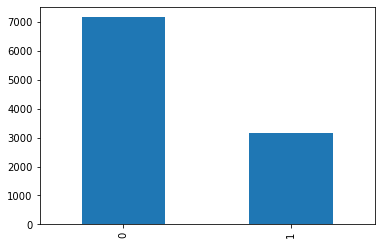

In [42]:
# Inspect data by using frequency distributions
data['Manufactured_India'].value_counts().plot.bar()

In [43]:
# Drop the emtpy values now that we have cleaned up the columns. 
# Doing this now since we will introduce more NaN below.
data = data.dropna()
data

,ID,Country,Fulfill Via,Vendor INCO Term,Shipment Mode,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Dosage Form,Line Item Quantity,Line Item Value,Pack Price,Weight (Kilograms),Freight Cost (USD),Delivery Days Late,Delivery Days Off,Vendor_SCMS,Generic Brand,Manufactured_India
0,1,Côte d'Ivoire,Direct Drop,EXW,Air,2006-06-02,2006-06-02,2006-06-02,HRDT,Test kit,19,551.00,29.00,13,780.34,0,0,0,0,0
1,3,Vietnam,Direct Drop,EXW,Air,2006-11-14,2006-11-14,2006-11-14,ARV,Oral solution,1000,6200.00,6.20,358,4521.5,0,0,0,1,1
2,4,Côte d'Ivoire,Direct Drop,Other,Air,2006-08-27,2006-08-27,2006-08-27,HRDT,Test kit,500,40000.00,80.00,171,1653.78,0,0,0,0,0
3,15,Vietnam,Direct Drop,EXW,Air,2006-09-01,2006-09-01,2006-09-01,ARV,Tablet,31920,127360.80,3.99,1855,16007.06,0,0,0,1,0
4,16,Vietnam,Direct Drop,EXW,Air,2006-08-11,2006-08-11,2006-08-11,ARV,Capsule,38000,121600.00,3.20,7590,45450.08,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,Zimbabwe,From RDC,N/A - From RDC,Truck,2015-07-31,2015-07-15,2015-07-20,ARV,Tablet,166571,599655.60,3.60,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),-16,16,1,1,0
10320,86819,Côte d'Ivoire,From RDC,N/A - From RDC,Truck,2015-07-31,2015-08-06,2015-08-07,ARV,Tablet,21072,137389.44,6.52,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),6,6,1,1,0
10321,86821,Zambia,From RDC,N/A - From RDC,Truck,2015-08-31,2015-08-25,2015-09-03,ARV,Tablet,514526,5140114.74,9.99,Weight Captured Separately,Freight Included in Commodity Cost,-6,6,1,1,0
10322,86822,Zimbabwe,From RDC,N/A - From RDC,Truck,2015-09-09,2015-08-04,2015-08-11,ARV,Tablet,17465,113871.80,6.52,1392,Freight Included in Commodity Cost,-36,36,1,1,0


<AxesSubplot:>

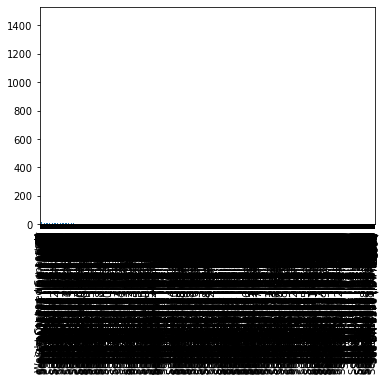

In [44]:
# Inspect data by using frequency distributions
data['Weight (Kilograms)'].value_counts().plot.bar()

In [45]:
# apply to numeric so that the string values show as NaN.
data['Weight (Kilograms)'] = data[
    'Weight (Kilograms)'].apply(pd.to_numeric, errors='coerce')

<AxesSubplot:>

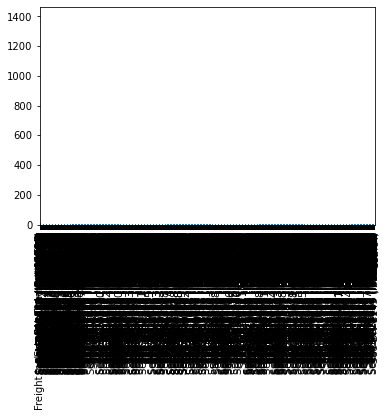

In [46]:
# Inspect data by using frequency distributions
data['Freight Cost (USD)'].value_counts().plot.bar()

In [47]:
data['Freight Cost (USD)'] = data[
    'Freight Cost (USD)'].apply(pd.to_numeric, errors='coerce')

<AxesSubplot:>

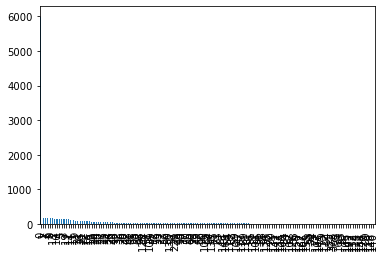

In [48]:
# Inspect data by using frequency distributions
data['Delivery Days Off'].value_counts().plot.bar()

In [49]:
data

,ID,Country,Fulfill Via,Vendor INCO Term,Shipment Mode,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Dosage Form,Line Item Quantity,Line Item Value,Pack Price,Weight (Kilograms),Freight Cost (USD),Delivery Days Late,Delivery Days Off,Vendor_SCMS,Generic Brand,Manufactured_India
0,1,Côte d'Ivoire,Direct Drop,EXW,Air,2006-06-02,2006-06-02,2006-06-02,HRDT,Test kit,19,551.00,29.00,13.0,780.34,0,0,0,0,0
1,3,Vietnam,Direct Drop,EXW,Air,2006-11-14,2006-11-14,2006-11-14,ARV,Oral solution,1000,6200.00,6.20,358.0,4521.50,0,0,0,1,1
2,4,Côte d'Ivoire,Direct Drop,Other,Air,2006-08-27,2006-08-27,2006-08-27,HRDT,Test kit,500,40000.00,80.00,171.0,1653.78,0,0,0,0,0
3,15,Vietnam,Direct Drop,EXW,Air,2006-09-01,2006-09-01,2006-09-01,ARV,Tablet,31920,127360.80,3.99,1855.0,16007.06,0,0,0,1,0
4,16,Vietnam,Direct Drop,EXW,Air,2006-08-11,2006-08-11,2006-08-11,ARV,Capsule,38000,121600.00,3.20,7590.0,45450.08,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,Zimbabwe,From RDC,N/A - From RDC,Truck,2015-07-31,2015-07-15,2015-07-20,ARV,Tablet,166571,599655.60,3.60,NaN,NaN,-16,16,1,1,0
10320,86819,Côte d'Ivoire,From RDC,N/A - From RDC,Truck,2015-07-31,2015-08-06,2015-08-07,ARV,Tablet,21072,137389.44,6.52,NaN,NaN,6,6,1,1,0
10321,86821,Zambia,From RDC,N/A - From RDC,Truck,2015-08-31,2015-08-25,2015-09-03,ARV,Tablet,514526,5140114.74,9.99,NaN,NaN,-6,6,1,1,0
10322,86822,Zimbabwe,From RDC,N/A - From RDC,Truck,2015-09-09,2015-08-04,2015-08-11,ARV,Tablet,17465,113871.80,6.52,1392.0,NaN,-36,36,1,1,0


In [50]:
# Let's remove outliers
data = data[(np.abs(stats.zscore(data['Delivery Days Late']))<3)]

In [51]:
# Set dummy variables
X1 = pd.get_dummies(data=data['Country'], drop_first=True)
X3 = pd.get_dummies(data=data['Vendor INCO Term'], drop_first=True)
X4 = pd.get_dummies(data=data['Shipment Mode'], drop_first=True)
X5 = data['Vendor_SCMS']
X6 = pd.get_dummies(data=data['Dosage Form'], drop_first=True)
X7 = data['Manufactured_India']
X8 = pd.get_dummies(data=data['Product Group'], drop_first=True)
X9 = data['Generic Brand']
Y = data['Delivery Days Off']

In [52]:
# Combine the string data with numeric data
X = pd.concat([X1, X3, X4, X5, X6, X7, X8, X9], axis=1)
X

,Côte d'Ivoire,Ethiopia,Guyana,Haiti,Mozambique,Nigeria,Other,Rwanda,South Africa,South Sudan,Tanzania,Uganda,Vietnam,Zambia,Zimbabwe,EXW,N/A - From RDC,Other,Air Charter,Ocean,Truck,Vendor_SCMS,Oral solution,Tablet,Test kit,Manufactured_India,HRDT,Other,Generic Brand
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,1
10320,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1
10321,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1
10322,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,1


In [53]:
# Split the data for testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size = 0.2, random_state = 42)

In [54]:
# Time for multiple linear regression!
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression()

In [55]:
print('Intercept: \n', regr.intercept_)
print('Coefficents: \n', regr.coef_)

Intercept: 
 4.048369596657476
Coefficents: 
 [-4.25064535e+00 -3.97540194e+00  6.56324060e+00 -5.61518509e+00
 -5.55855977e+00 -3.68486940e+00 -3.45738828e+00 -1.88488425e+00
  2.11363307e+00 -3.57701772e+00 -2.23545622e+00 -3.14103233e+00
 -4.76777629e+00 -3.92013571e+00 -4.58826853e+00  6.04577250e-01
  5.48905750e+00 -1.60011616e-02  6.11790627e+00  2.14740280e+00
  1.35614077e+00  5.48905750e+00 -2.71606499e-01 -2.42387764e-01
  2.11828530e+01 -2.67265214e+00 -2.22088324e+01 -5.42236845e+00
  1.62890144e+00]


In [56]:
Y_prediction = regr.predict(X_test)
Y_prediction

array([13.18087051, -0.62367786, 15.53368282, ...,  1.78881518,
        7.023267  , 13.90478138])

In [57]:
# Predicting the accuracy score
score = r2_score(Y_test, Y_prediction)
print('r2 score is', score)
print('mean_sqrd_error is==', mean_squared_error(Y_test, Y_prediction))
print('root_mean_squared error is==', np.sqrt(mean_squared_error(Y_test, Y_prediction)))

r2 score is 0.14190548625618182
mean_sqrd_error is== 213.0484771110802
root_mean_squared error is== 14.596180223300896


In [58]:
# This is a very bad r2 score.
# Let's remove outliers.
# Let's different variables and combinations.

In [84]:
# Drop the NaN values
data_to_strip = data[['Line Item Quantity', 'Line Item Value', 'Pack Price', 
            'Weight (Kilograms)', 'Freight Cost (USD)', 'Delivery Days Off', 'Delivery Days Late']]
data_stripped = data_to_strip.dropna()


In [86]:
# Remove the outliers from the numerical X values.
data_stripped = data_stripped[(
    np.abs(stats.zscore(data_stripped)) < 3).all(axis=1)]
data_stripped

,Line Item Quantity,Line Item Value,Pack Price,Weight (Kilograms),Freight Cost (USD),Delivery Days Off,Delivery Days Late
0,19,551.00,29.00,13.0,780.34,0,0
1,1000,6200.00,6.20,358.0,4521.50,0,0
2,500,40000.00,80.00,171.0,1653.78,0,0
3,31920,127360.80,3.99,1855.0,16007.06,0,0
5,416,2225.60,5.35,504.0,5920.42,0,0
...,...,...,...,...,...,...,...
10302,47733,91647.36,1.92,6368.0,2592.56,22,-22
10304,28516,220143.52,7.72,3772.0,3567.08,17,17
10306,16006,73467.54,4.59,1504.0,1653.90,17,17
10310,18000,64800.00,3.60,2253.0,3785.72,26,-26


In [87]:
# Normalize the data.
data_norm = (data_stripped - data_stripped.mean()) / data_stripped.std()
data_norm

,Line Item Quantity,Line Item Value,Pack Price,Weight (Kilograms),Freight Cost (USD),Delivery Days Off,Delivery Days Late
0,-0.666813,-0.741748,0.244671,-0.762948,-0.884933,-0.503427,0.188711
1,-0.609361,-0.704313,-0.615747,-0.601478,-0.438252,-0.503427,0.188711
2,-0.638644,-0.480330,2.169289,-0.688999,-0.780647,-0.503427,0.188711
3,1.201465,0.098588,-0.699147,0.099160,0.933079,-0.503427,0.188711
5,-0.643563,-0.730651,-0.647824,-0.533146,-0.271227,-0.503427,0.188711
...,...,...,...,...,...,...,...
10302,2.127551,-0.138076,-0.777264,2.211372,-0.668561,2.538395,-2.576149
10304,1.002110,0.713435,-0.558386,0.996371,-0.552207,1.847072,2.325194
10306,0.269463,-0.258549,-0.676504,-0.065118,-0.780633,1.847072,2.325194
10310,0.386242,-0.315986,-0.713864,0.285436,-0.526102,3.091454,-3.078850


In [88]:
x1 = data_norm[['Line Item Quantity', 'Line Item Value', 'Pack Price', 
            'Weight (Kilograms)', 'Freight Cost (USD)']]
y1 = data_norm['Delivery Days Off']

In [89]:
x1_train, x1_test, y1_train, y1_test = train_test_split(
    x1, y1, test_size = 0.2, random_state = 42)

In [90]:
regr1 = linear_model.LinearRegression()
regr1.fit(x1_train, y1_train)

LinearRegression()

In [91]:
print('Intercept: \n', regr1.intercept_)
print('Coefficents: \n', regr1.coef_)

Intercept: 
 -0.000979506462626224
Coefficents: 
 [ 0.01008829  0.02204402 -0.20205308  0.05751609  0.00706066]


In [92]:
y1_prediction = regr1.predict(x1_test)
y1_prediction

array([ 0.05051529,  0.06108463,  0.20663822,  0.10800829,  0.11251436,
       -0.09893304,  0.24017365,  0.07436293, -0.60027345, -0.04663042,
        0.12220815,  0.08059771, -0.11831965, -0.18320387, -0.14433586,
        0.05928967, -0.00166541,  0.10431604,  0.19988376, -0.05410234,
        0.04931869, -0.1755017 ,  0.09274489, -0.37694681, -0.5087129 ,
       -0.08402617, -0.03074486, -0.01435063, -0.33501507,  0.08748982,
        0.03371515, -0.06987493, -0.34409746, -0.14157303,  0.19924372,
       -0.13328542,  0.03636774, -0.58671226,  0.05730049,  0.06090308,
       -0.42213226, -0.04863739,  0.03189447,  0.44415665,  0.10234141,
       -0.42877293, -0.14690234, -0.5530598 ,  0.12139813, -0.11895305,
       -0.07402313,  0.09501463, -0.41394251,  0.06587511, -0.06258785,
       -0.44370966, -0.21473579,  0.05129415,  0.20306532,  0.10857652,
        0.22886495, -0.10840701,  0.13756605, -0.51019837, -0.09731307,
        0.13053343,  0.07996219, -0.07985315,  0.16738689,  0.08

In [93]:
score1 = r2_score(y1_test, y1_prediction)
print('r2 score is', score1)
print('mean_sqrd_error is==', mean_squared_error(y1_test, y1_prediction))
print('root_mean_squared error is==', np.sqrt(mean_squared_error(y1_test, y1_prediction)))


r2 score is 0.05272771033645396
mean_sqrd_error is== 0.9261036948588818
root_mean_squared error is== 0.962342815663359


In [100]:
# ALL IN ONE CODE BLOCK for numerical variables:
# Set the data
x2 = data_norm[['Pack Price', 'Weight (Kilograms)']]
y2 = data_norm['Delivery Days Off']

# Create a test set and training set
x2_train, x2_test, y2_train, y2_test = train_test_split(
    x2, y2, test_size = 0.2, random_state = 42)

# Run linear regression
regr2 = linear_model.LinearRegression()
regr2.fit(x2_train, y2_train)

# Print intercept and coefficients
print('Intercept: \n', regr2.intercept_)
print('Coefficents: \n', regr2.coef_)

# Test model with prediction on test set
y2_prediction = regr2.predict(x2_test)
y2_prediction

# Calculate the r^2 value
score2 = r2_score(y2_test, y2_prediction)
print('r2 score is', score2)
print('mean_sqrd_error is==', mean_squared_error(
    y2_test, y2_prediction))
print('root_mean_squared error is==', np.sqrt(
    mean_squared_error(y2_test, y2_prediction)))

Intercept: 
 -0.0008943466344949694
Coefficents: 
 [-0.19479145  0.08206448]
r2 score is 0.052136179065619626
mean_sqrd_error is== 0.9266820072422608
root_mean_squared error is== 0.9626432398569372


In [83]:
# ALL IN ONE CODE BLOCK for categorical variables:
# Set the data
# If categorical - get dummy variables
x_1 = pd.get_dummies(data=data['Product Group'], drop_first = True)
x_2 = pd.get_dummies(data=data['Vendor INCO Term'], drop_first = True)
x_3 = pd.get_dummies(data=data['Shipment Mode'], drop_first = True)
x2 = pd.concat([x_1, x_2, x_3], axis=1)
y2 = data['Delivery Days Off']
# Create a test set and training set
x2_train, x2_test, y2_train, y2_test = train_test_split(
    x2, y2, test_size = 0.2, random_state = 42)

# Run linear regression
regr2 = linear_model.LinearRegression()
regr2.fit(x2_train, y2_train)

# Print intercept and coefficients
print('Intercept: \n', regr2.intercept_)
print('Coefficents: \n', regr2.coef_)

# Test model with prediction on test set
y2_prediction = regr2.predict(x2_test)
y2_prediction

# Calculate the r^2 value
score2 = r2_score(y2_test, y2_prediction)
print('r2 score is', score2)
print('mean_sqrd_error is==', mean_squared_error(
    y2_test, y2_prediction))
print('root_mean_squared error is==', np.sqrt(
    mean_squared_error(y2_test, y2_prediction)))

Intercept: 
 5.691079904655469
Coefficents: 
 [-0.72538815 -1.18532333 -4.48288568  6.15888555 -5.26049615  5.79143925
  2.1251878   1.23278439]
r2 score is 0.13519970444526996
mean_sqrd_error is== 214.7133946461205
root_mean_squared error is== 14.65310187796838


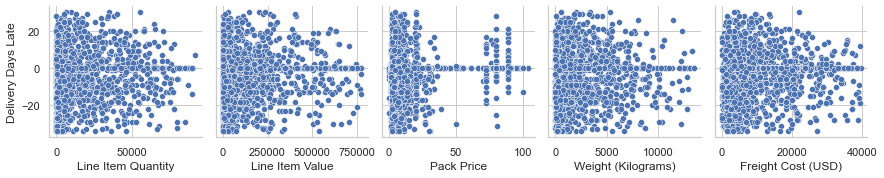

In [103]:
pp1 = sns.pairplot(data=data_stripped, 
                  y_vars = ['Delivery Days Late'], 
                  x_vars = ['Line Item Quantity', 'Line Item Value', 
                            'Pack Price','Weight (Kilograms)', 
                            'Freight Cost (USD)'])

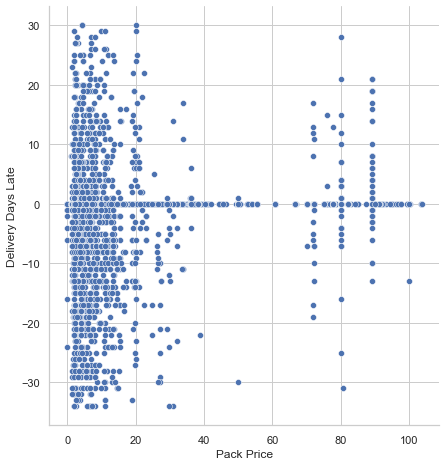

In [113]:
pp2 = sns.pairplot(data=data_stripped, 
                  y_vars = ['Delivery Days Late'], 
                  x_vars = ['Pack Price'])
pp2.fig.set_size_inches(8,8)

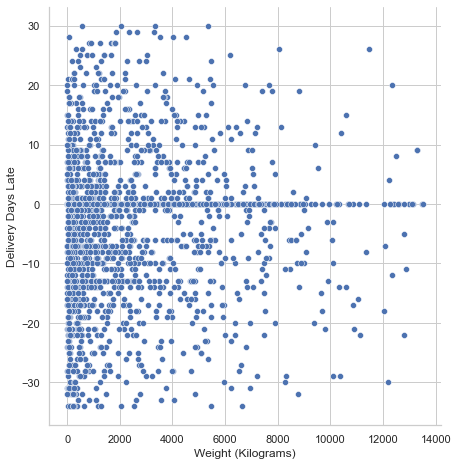

In [112]:
pp3 = sns.pairplot(data=data_stripped, 
                  y_vars = ['Delivery Days Late'], 
                  x_vars = ['Weight (Kilograms)'])
pp3.fig.set_size_inches(8,8)

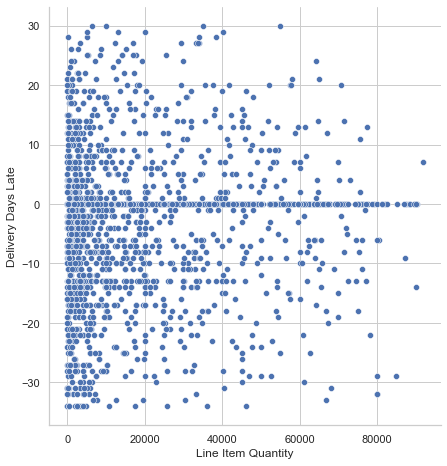

In [114]:
pp2 = sns.pairplot(data=data_stripped, 
                  y_vars = ['Delivery Days Late'], 
                  x_vars = ['Line Item Quantity'])
pp2.fig.set_size_inches(8,8)

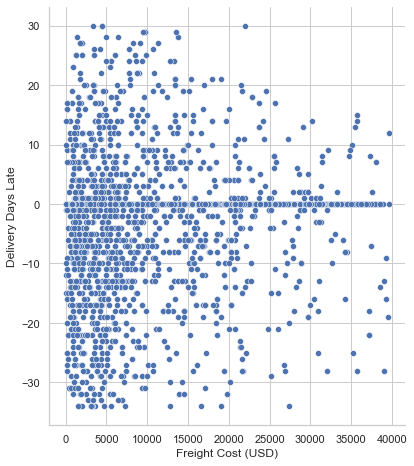

In [115]:
pp2 = sns.pairplot(data=data_stripped, 
                  y_vars = ['Delivery Days Late'], 
                  x_vars = ['Freight Cost (USD)'])
pp2.fig.set_size_inches(8,8)

Text(0.5, 1.0, 'Fulfilled Via vs Delivery Days Late')

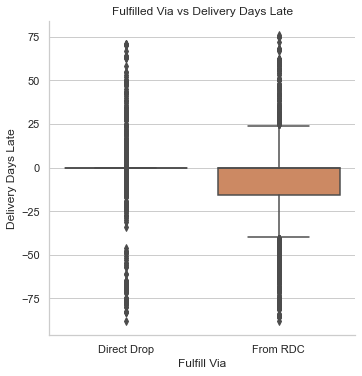

In [117]:
sns.set_style('whitegrid')
sns.catplot(x='Fulfill Via', y='Delivery Days Late', 
            kind='box', data = data)
plt.title("Fulfilled Via vs Delivery Days Late")

Text(0.5, 1.0, 'Vendor INCO Term vs Delivery Days Late')

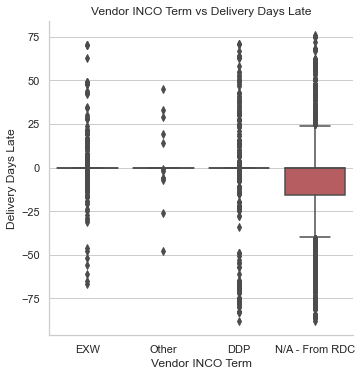

In [71]:
sns.set_theme(style='whitegrid', palette='deep')
sns.catplot(x='Vendor INCO Term', y='Delivery Days Late', 
            kind='box', data = data)
plt.title("Vendor INCO Term vs Delivery Days Late")

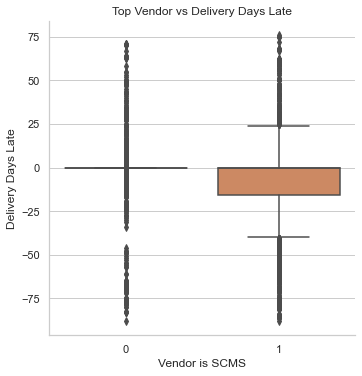

In [72]:
sns.set_style("whitegrid")
plot3 = sns.catplot(x='Vendor_SCMS', y='Delivery Days Late', 
            kind='box', data = data)
plot3.set(xlabel = 'Vendor is SCMS', title = 'Top Vendor vs Delivery Days Late')

Text(0.5, 1.0, 'Shipment Mode vs Delivery Days Late')

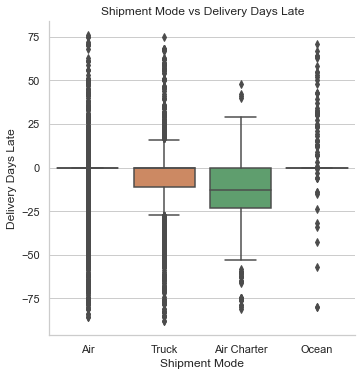

In [101]:
sns.set_theme(style='whitegrid', palette='deep')
sns.catplot(x='Shipment Mode', y='Delivery Days Late', 
            kind='box', data = data)
plt.title("Shipment Mode vs Delivery Days Late")

Text(0.5, 1.0, 'Product Group vs Delivery Days Late')

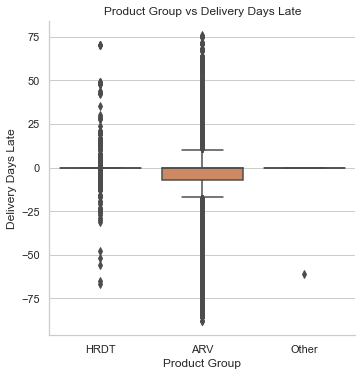

In [102]:
sns.set_theme(style='whitegrid', palette='deep')
sns.catplot(x='Product Group', y='Delivery Days Late', 
            kind='box', data = data)
plt.title("Product Group vs Delivery Days Late")

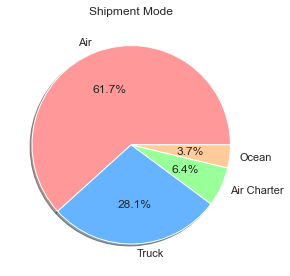

In [73]:
data['Shipment Mode'].value_counts(
).plot(kind='pie', autopct = '%.1f%%', title = 'Shipment Mode', 
       label = "", colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99'], 
      shadow=True)
plt.tight_layout()
plt.show()

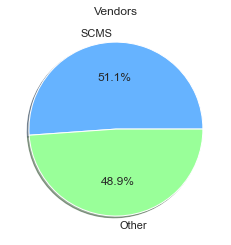

In [74]:
Vendor_Pie = data['Vendor_SCMS'].value_counts(
).plot(kind='pie', labels = ['SCMS', 'Other'], autopct = "%.1f%%", 
       title = 'Vendors', label = "", shadow=True, 
       colors = ['#66b3ff', '#99ff99'])
plt.show()


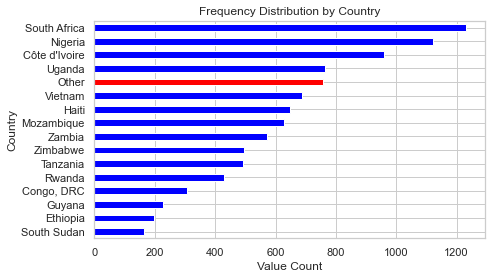

In [75]:
fig, ax = plt.subplots(figsize = (7,4))
data['Country'].value_counts(
).plot.barh(style='White', title = 'Frequency Distribution by Country', 
           ax=ax, legend = False, xlabel = 'Country', 
           color = ['blue','blue','blue','blue','red','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue'])
ax.set_xlabel('Value Count')
ax.set_ylabel('Country')
plt.gca().invert_yaxis()
plt.show()